In [1]:
import scipy
import numpy as np
import pandas as pd

import matplotlib
import matplotlib.pyplot as plt

for m in [scipy, np, pd, matplotlib]:
    print(m.__name__, m.__version__)

scipy 1.15.2
numpy 1.26.4
pandas 2.2.3
matplotlib 3.10.1


In [2]:
# import talib

from scipy.signal import savgol_filter
from scipy.signal import argrelextrema

from funcs.factor_utils import FactorUtil

In [3]:
bar_df_1 = FactorUtil.get_bar_df('FG2409_MIN_1', '20240401', '00:00:00', 200)
bar_df_1.head()

,O,H,L,C,V,AP,AV,BP,BV
ts,,,,,,,,,
2024-08-01 09:00:00,1384.0,1384.0,1383.0,1383.0,1380,1383.994,165,1382.000,112
2024-08-01 09:01:00,1383.0,1384.0,1380.0,1381.0,5492,1381.725,22069,1380.437,31489
2024-08-01 09:02:00,1381.0,1383.0,1380.0,1383.0,3584,1382.111,51358,1380.873,49594
2024-08-01 09:03:00,1384.0,1385.0,1382.0,1383.0,2770,1383.415,53411,1382.259,49463
2024-08-01 09:04:00,1383.0,1383.0,1381.0,1382.0,1779,1382.253,32249,1381.110,57441


In [4]:
bar_df_1.shape

(200, 9)

In [5]:
# step 1: smoothed_series
s_close = savgol_filter(bar_df_1['C'], window_length=5, polyorder=2)
# s_close

In [6]:
bar_df_1['S'] = s_close
# bar_df_1['S']

In [7]:
# step 2: 
peaks = argrelextrema(s_close, np.greater, order=10)
troughs = argrelextrema(s_close, np.less, order=10)
peaks, troughs

((array([  3, 111, 147, 167, 188]),), (array([ 21,  81, 127, 158, 182]),))

In [8]:
bar_df_1.assign(P = np.nan)
for idx in peaks:
    df_idx = bar_df_1['S'].iloc[idx].index
    print(bar_df_1['S'].iloc[idx])
    bar_df_1.loc[df_idx, 'P'] = bar_df_1['S'].iloc[idx]

ts
2024-08-01 09:03:00    1382.828571
2024-08-01 11:05:00    1360.142857
2024-08-01 13:40:00    1354.000000
2024-08-01 14:00:00    1352.428571
2024-08-01 14:21:00    1352.285714
Name: S, dtype: float64


In [9]:
bar_df_1.assign(T = np.nan)
for idx in troughs:
    df_idx = bar_df_1['S'].iloc[idx].index
    print(bar_df_1['S'].iloc[idx])
    bar_df_1.loc[df_idx, 'T'] = bar_df_1['S'].iloc[idx]

ts
2024-08-01 09:21:00    1373.085714
2024-08-01 10:35:00    1357.485714
2024-08-01 11:21:00    1348.057143
2024-08-01 13:51:00    1349.228571
2024-08-01 14:15:00    1347.342857
Name: S, dtype: float64


In [10]:
bar_df_1.head()

,O,H,L,C,V,AP,AV,BP,BV,S,P,T
ts,,,,,,,,,,,,
2024-08-01 09:00:00,1384.0,1384.0,1383.0,1383.0,1380,1383.994,165,1382.000,112,1382.400000,NaN,NaN
2024-08-01 09:01:00,1383.0,1384.0,1380.0,1381.0,5492,1381.725,22069,1380.437,31489,1382.400000,NaN,NaN
2024-08-01 09:02:00,1381.0,1383.0,1380.0,1383.0,3584,1382.111,51358,1380.873,49594,1382.400000,NaN,NaN
2024-08-01 09:03:00,1384.0,1385.0,1382.0,1383.0,2770,1383.415,53411,1382.259,49463,1382.828571,1382.828571,NaN
2024-08-01 09:04:00,1383.0,1383.0,1381.0,1382.0,1779,1382.253,32249,1381.110,57441,1382.600000,NaN,NaN


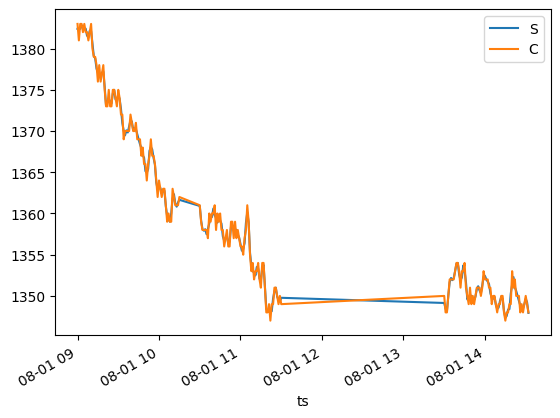

In [11]:
ax = bar_df_1[['S','C']].plot()

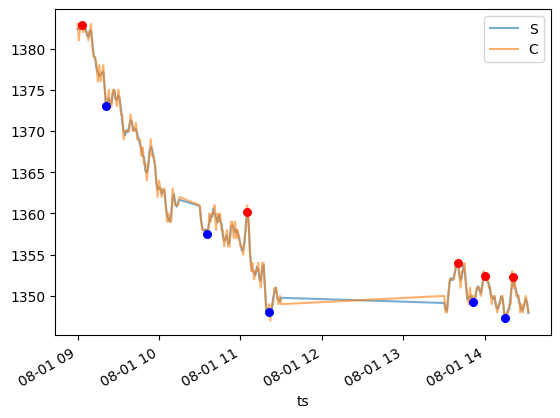

In [19]:
ax = bar_df_1[['S','C']].plot(alpha=0.6)
ax.scatter(
    x=bar_df_1.index,
    y=bar_df_1["P"],
    color="red",
    s=30,
    zorder=5,
)
ax.scatter(
    x=bar_df_1.index,
    y=bar_df_1["T"],
    color="blue",
    s=30,
    zorder=6,
)
plt.show()

In [22]:
bar_df_2 = FactorUtil.get_bar_df('FG2409_MIN_1', '20240401', '00:00:00', 100)
s_close_2 = savgol_filter(bar_df_2['C'], window_length=5, polyorder=2)
bar_df_2['S'] = s_close_2
peaks_2 = argrelextrema(s_close_2, np.greater, order=10)
troughs_2 = argrelextrema(s_close_2, np.less, order=10)
peaks_2, troughs_2

((array([3]),), (array([21, 81, 97]),))

In [24]:
bar_df_2.assign(P = np.nan)
for idx in peaks_2:
    df_idx = bar_df_2['S'].iloc[idx].index
    print(bar_df_2['S'].iloc[idx])
    bar_df_2.loc[df_idx, 'P'] = bar_df_2['S'].iloc[idx]
bar_df_2.assign(T = np.nan)
for idx in troughs_2:
    df_idx = bar_df_2['S'].iloc[idx].index
    print(bar_df_2['S'].iloc[idx])
    bar_df_2.loc[df_idx, 'T'] = bar_df_2['S'].iloc[idx]

ts
2024-08-01 09:03:00    1382.828571
Name: S, dtype: float64
ts
2024-08-01 09:21:00    1373.085714
2024-08-01 10:35:00    1357.485714
2024-08-01 10:51:00    1356.342857
Name: S, dtype: float64


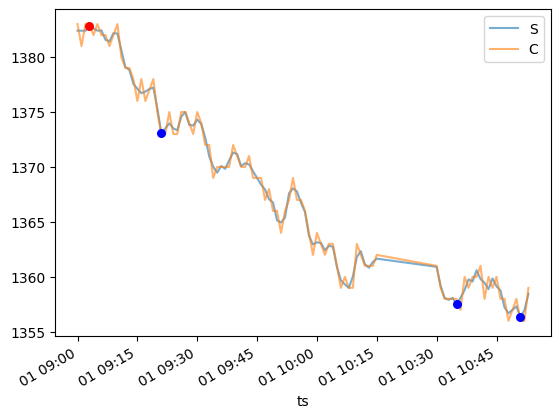

In [25]:
ax = bar_df_2[['S','C']].plot(alpha=0.6)
ax.scatter(
    x=bar_df_2.index,
    y=bar_df_2["P"],
    color="red",
    s=30,
    zorder=5,
)
ax.scatter(
    x=bar_df_2.index,
    y=bar_df_2["T"],
    color="blue",
    s=30,
    zorder=6,
)
plt.show()